In [ ]:
filename = "/content/втрати_противника"
filtered_lines = []

# Зчитуємо файл і фільтруємо рядки
with open(filename, "r", encoding="utf-8") as f:
    for line in f:
        if ("напрям" not in line ) and ("трат" not in line):
            filtered_lines.append(line)



In [ ]:
from datetime import datetime, timedelta

current_date = datetime.strptime('26.06.23', '%d.%m.%y')

while "\n" in filtered_lines:
    index = filtered_lines.index("\n")
    filtered_lines[index] = current_date.strftime('%d.%m.%y')
    current_date -= timedelta(days=1)




In [ ]:
import pandas as pd
import re
def is_valid_date(date_string, format='%d.%m.%y'):
    try:
        datetime.strptime(date_string, format)
        return True
    except ValueError:
        return False
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
new_list=[]
for line in filtered_lines:
  if is_valid_date(line)==False:
    words=line.split()
    for word in words:
       if is_number(word):
         if "." in word:
           word = word.replace(".", "")
         new_list.append(words[0]+" "+word)
  else:
       new_list.append(line)

In [ ]:
for i in range(0,len(new_list)):
  if "РСЗВ–" in new_list[i]:
    new_list[i]=new_list[i].replace("РСЗВ–","РСЗВ")
  if "кораблі/катери" in  new_list[i]:
    new_list[i]=new_list[i].replace("кораблі/катери","кораблі")



In [ ]:
osob=[]
tank=[]
cor=[]
art=[]
rcb=[]
boi=[]
zas=[]
lit=[]
helic=[]
avto=[]
spez=[]
crulat=[]
bpla=[]
for i in new_list:
  if "РСЗВ" in  i:
    rcb.append(float(i.split()[1]))
  if "кораблі" in  i:
    cor.append(float(i.split()[1]))
  if "танків" in  i:
    tank.append(float(i.split()[1]))
  if "особового" in  i:
    osob.append(float(i.split()[1]))
  if "артилерійських" in  i:
    art.append(float(i.split()[1]))
  if "бойових" in  i:
    boi.append(float(i.split()[1]))
  if "засоби" in  i:
    zas.append(float(i.split()[1]))
  if "літаків" in  i:
    lit.append(float(i.split()[1]))
  if "гелікоптерів" in  i:
    helic.append(float(i.split()[1]))
  if "автомобільної" in  i:
    avto.append(float(i.split()[1]))
  if "крилаті" in  i:
    crulat.append(float(i.split()[1]))
  if "спеціальна" in  i:
    spez.append(float(i.split()[1]))
  if "БПЛА" in  i:
    bpla.append(float(i.split()[1]))


In [ ]:
def diff(list):
  for i in range(0,len(list)-1):
    list[i]= list[i]- list[i+1]
  return list

In [ ]:
osob=diff(osob)
tank=diff(tank)
cor=diff(cor)
art=diff(art)
rcb=diff(rcb)
boi=diff(boi)
zas=diff(zas)
lit=diff(lit)
helic=diff(helic)
avto=diff(avto)
spez=diff(spez)
crulat=diff(crulat)
bpla=diff(bpla)

In [ ]:
new_list_new=[]
for i in new_list:
  if "РСЗВ" in  i:
    new_list_new.append(i.split()[0]+" "+str(rcb[0]))
    rcb.pop(0)
  if "кораблі" in  i:
        new_list_new.append(i.split()[0]+" "+str(cor[0]))
        cor.pop(0)
  if "танків" in  i:
        new_list_new.append(i.split()[0]+" "+str(tank[0]))
        tank.pop(0)

  if "особового" in  i:
        new_list_new.append(i.split()[0]+" "+str(osob[0]))
        osob.pop(0)
  if "артилерійських" in  i:
        new_list_new.append(i.split()[0]+" "+str(art[0]))
        art.pop(0)
  if "бойових" in  i:

        new_list_new.append(i.split()[0]+" "+str(boi[0]))
        boi.pop(0)
  if "засоби" in  i:
        new_list_new.append(i.split()[0]+" "+str(zas[0]))
        zas.pop(0)
  if "літаків" in  i:
        new_list_new.append(i.split()[0]+" "+str(lit[0]))
        lit.pop(0)
  if "гелікоптерів" in  i:
        new_list_new.append(i.split()[0]+" "+str(helic[0]))
        helic.pop(0)
  if "автомобільної" in  i:
        new_list_new.append(i.split()[0]+" "+str(avto[0]))
        avto.pop(0)
  if "крилаті" in  i:
        new_list_new.append(i.split()[0]+" "+str(crulat[0]))
        crulat.pop(0)
  if "спеціальна" in  i:
            new_list_new.append(i.split()[0]+" "+str(spez[0]))
            spez.pop(0)
  if "БПЛА" in  i:
            new_list_new.append(i.split()[0]+" "+str(bpla[0]))
            bpla.pop(0)
  if is_valid_date(i):
         new_list_new.append(i)

In [ ]:
# pd.set_option('display.max_columns', None)  # відображення всіх стовпців
# pd.set_option('display.expand_frame_repr', False)  # заборонити обмеження ширини виводу
# pd.set_option('display.max_rows', None)
records = []
record = {}

for line in new_list_new:
    if ('.23' in line) or ('.22' in line):  # Це схоже на дату
        if record:  # Якщо запис не пустий, зберегти його
            records.append(record)
            record = {}
        record['Date'] = line
    else:
        item, value = line.split()
        record[item] = float(value)

# Додати останній запис, якщо він існує
if record:
    records.append(record)

df = pd.DataFrame(records)
df.drop(["кораблі"],axis=1,inplace=True)



In [ ]:

df=df[:421]
df.loc[df['Date'] == "2023-05-08", 'особового'] = 540
df.loc[df['Date'] == "2023-05-07", 'особового'] = 660
df.loc[df['Date'] == "2022-11-17", 'крилаті'] = 0
df.loc[df['Date'] == "2022-11-16", 'крилаті'] = 75
df.loc[df['Date'] == "2022-11-25", 'особового'] = 430
df.loc[df['Date'] == "2022-11-24", 'особового'] = 970

df.loc[df['Date'] == "2022-09-06", 'засоби'] = 0
df.loc[df['Date'] == "2022-09-05", 'засоби'] = 0

df.loc[df['Date'] == "2022-07-18", 'гелікоптерів'] = 0

df.loc[df['Date'] == "2023-05-28", 'танків'] = 3

df.loc[df['Date'] == "2022-10-13", 'бойових'] = 11

df.loc[df['Date'] == "2022-07-23", 'особового'] = 240
df.loc[df['Date'] == "2022-07-22", 'особового'] = 640
df.loc[df['Date'] == "2022-07-21", 'особового'] = 100

df.loc[df['Date'] == "2022-07-21", 'танків'] = 4

df.loc[df['Date'] == "2022-07-04", 'особового'] = 770

df.loc[df['Date'] == "2022-07-18", 'літаків'] = 0

df.loc[df['Date'] == "2022-07-05", 'особового'] = 150
df.loc[df['Date'] == "2022-07-06", 'особового'] = 770

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            421 non-null    datetime64[ns]
 1   особового       421 non-null    float64       
 2   танків          421 non-null    float64       
 3   бойових         421 non-null    float64       
 4   артилерійських  421 non-null    float64       
 5   РСЗВ            421 non-null    float64       
 6   засоби          421 non-null    float64       
 7   літаків         421 non-null    float64       
 8   гелікоптерів    421 non-null    float64       
 9   БПЛА            421 non-null    float64       
 10  крилаті         421 non-null    float64       
 11  автомобільної   421 non-null    float64       
 12  спеціальна      421 non-null    float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 42.9 KB


In [ ]:
df.to_csv('втрати.csv', index=False, encoding='utf-8-sig')

In [ ]:
import pandas as pd
alarms=pd.read_csv("/content/alarms.csv",delimiter=";")


In [ ]:



alarms['start'] = pd.to_datetime(alarms['start'])
alarms['end'] = pd.to_datetime(alarms['end'])

alarms['duration'] = alarms['end'] - alarms['start']
# # Перетворюємо колонки 'start' та 'end' у формат datetime
# alarms['start'] = pd.to_datetime(alarms['start'])
# alarms['end'] = pd.to_datetime(alarms['end'])

# # Сортуємо дані за регіоном та датою початку
# alarms = alarms.sort_values(by=['region_city', 'start'])

# # Розраховуємо різницю між початком поточної тривоги і кінцем попередньої для кожного регіону
# alarms['time_gap'] = alarms.groupby('region_city')['start'].shift(0) - alarms.groupby('region_city')['end'].shift(1)

# alarms = alarms[~((alarms['time_gap'] < pd.Timedelta(0)) | alarms['time_gap'].isna())]
# # Відсортуйте датафрейм за часом початку
# alarms = alarms.sort_values(by='start')
alarms = alarms.sort_values(by=['region_city', 'start'])

# Розраховуємо різницю у часі між початком поточної тривоги та початком наступної для кожного регіону
alarms['time_to_next_alarm'] = alarms.groupby('region_city')['start'].diff(-1).abs()
#alarms['time_to_next_alarm']= pd.to_datetime(alarms['time_to_next_alarm'])
alarms['time_to_next_alarm']=alarms['time_to_next_alarm']-alarms['duration']
# Виведення результатів
alarms = alarms[~((alarms['time_to_next_alarm'] < pd.Timedelta(0)) | alarms['time_to_next_alarm'].isna())]
alarms = alarms.sort_values(by='start')
alarms

,id,region_id,region_city,all_region,start,end,duration,time_to_next_alarm
0,52432,12,Львівська обл.,1,2022-02-24 07:43:17,2022-02-24 09:52:28,0 days 02:09:11,0 days 21:00:49
1,53292,23,Чернігівська обл.,1,2022-02-24 14:00:43,2022-02-24 17:11:43,0 days 03:11:00,0 days 13:35:00
2,52080,3,Вінницька обл.,1,2022-02-24 15:40:42,2022-02-24 16:10:42,0 days 00:30:00,0 days 11:51:00
3,52857,19,Харківська обл.,1,2022-02-24 20:11:47,2022-02-24 20:59:47,0 days 00:48:00,0 days 07:57:00
4,52700,18,Тернопільська обл.,1,2022-02-25 01:59:36,2022-02-25 09:00:19,0 days 07:00:43,1 days 07:10:17
...,...,...,...,...,...,...,...,...
26744,91691,5,Донецька обл.,1,2023-06-25 10:58:55,2023-06-25 11:12:55,0 days 00:14:00,0 days 06:23:53
26745,91865,19,Харківська обл.,1,2023-06-25 11:03:28,2023-06-25 11:05:34,0 days 00:02:06,0 days 06:08:53
26747,91866,19,Харківська обл.,1,2023-06-25 17:14:27,2023-06-25 18:33:37,0 days 01:19:10,0 days 03:59:18
26748,91692,5,Донецька обл.,1,2023-06-25 17:36:48,2023-06-25 18:35:39,0 days 00:58:51,0 days 03:14:53


In [ ]:
alarms['start'] = pd.to_datetime(alarms['start'])
alarms['end'] = pd.to_datetime(alarms['end'])


In [ ]:
alarms['start_date'] = pd.to_datetime(alarms['start']).dt.date
alarms['start_time'] = pd.to_datetime(alarms['start']).dt.time
alarms.drop(["end",'start'], axis=1,inplace=True)

In [ ]:
alarms

,id,region_id,region_city,all_region,duration,time_to_next_alarm,start_date,start_time
0,52432,12,Львівська обл.,1,0 days 02:09:11,0 days 21:00:49,2022-02-24,07:43:17
1,53292,23,Чернігівська обл.,1,0 days 03:11:00,0 days 13:35:00,2022-02-24,14:00:43
2,52080,3,Вінницька обл.,1,0 days 00:30:00,0 days 11:51:00,2022-02-24,15:40:42
3,52857,19,Харківська обл.,1,0 days 00:48:00,0 days 07:57:00,2022-02-24,20:11:47
4,52700,18,Тернопільська обл.,1,0 days 07:00:43,1 days 07:10:17,2022-02-25,01:59:36
...,...,...,...,...,...,...,...,...
26744,91691,5,Донецька обл.,1,0 days 00:14:00,0 days 06:23:53,2023-06-25,10:58:55
26745,91865,19,Харківська обл.,1,0 days 00:02:06,0 days 06:08:53,2023-06-25,11:03:28
26747,91866,19,Харківська обл.,1,0 days 01:19:10,0 days 03:59:18,2023-06-25,17:14:27
26748,91692,5,Донецька обл.,1,0 days 00:58:51,0 days 03:14:53,2023-06-25,17:36:48


In [ ]:
#df = df.set_index('Date')
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%y')


In [ ]:
alarms['start_date'] = pd.to_datetime(alarms['start_date'], format='%Y-%m-%d')

In [ ]:
result = pd.merge(df, alarms, left_on='Date', right_on='start_date', how='inner')

In [ ]:
result


,Date,особового,танків,бойових,артилерійських,РСЗВ,засоби,літаків,гелікоптерів,БПЛА,...,автомобільної,спеціальна,id,region_id,region_city,all_region,duration,time_to_next_alarm,start_date,start_time
0,2023-06-25,720.0,6.0,2.0,19.0,5.0,2.0,0.0,0.0,12.0,...,4.0,4.0,91740,8,Запорізька обл.,1,0 days 02:01:37,0 days 06:46:28,2023-06-25,01:17:03
1,2023-06-25,720.0,6.0,2.0,19.0,5.0,2.0,0.0,0.0,12.0,...,4.0,4.0,91688,5,Донецька обл.,1,0 days 00:59:52,0 days 00:21:56,2023-06-25,07:28:25
2,2023-06-25,720.0,6.0,2.0,19.0,5.0,2.0,0.0,0.0,12.0,...,4.0,4.0,91689,5,Донецька обл.,1,0 days 00:25:52,0 days 01:13:29,2023-06-25,08:50:13
3,2023-06-25,720.0,6.0,2.0,19.0,5.0,2.0,0.0,0.0,12.0,...,4.0,4.0,91741,8,Запорізька обл.,1,0 days 00:35:03,0 days 10:51:03,2023-06-25,10:05:08
4,2023-06-25,720.0,6.0,2.0,19.0,5.0,2.0,0.0,0.0,12.0,...,4.0,4.0,91690,5,Донецька обл.,1,0 days 00:12:34,0 days 00:16:47,2023-06-25,10:29:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19862,2022-05-02,300.0,22.0,48.0,8.0,1.0,0.0,2.0,0.0,26.0,...,28.0,6.0,67763,19,Харківська обл.,1,0 days 00:44:19,0 days 01:12:43,2022-05-02,18:44:43
19863,2022-05-02,300.0,22.0,48.0,8.0,1.0,0.0,2.0,0.0,26.0,...,28.0,6.0,64505,13,Миколаїв,0,0 days 01:50:57,1 days 22:37:07,2022-05-02,19:26:38
19864,2022-05-02,300.0,22.0,48.0,8.0,1.0,0.0,2.0,0.0,26.0,...,28.0,6.0,67764,19,Харківська обл.,1,0 days 00:15:09,0 days 03:12:47,2022-05-02,20:41:45
19865,2022-05-02,300.0,22.0,48.0,8.0,1.0,0.0,2.0,0.0,26.0,...,28.0,6.0,64634,14,Одеська обл.,1,0 days 00:23:12,0 days 20:39:30,2022-05-02,21:15:13


In [ ]:
result.columns

Index(['Date', 'особового', 'танків', 'бойових', 'артилерійських', 'РСЗВ',
       'засоби', 'літаків', 'гелікоптерів', 'БПЛА', 'крилаті', 'автомобільної',
       'спеціальна', 'id', 'region_id', 'region_city', 'all_region',
       'duration', 'time_to_next_alarm', 'start_date', 'start_time'],
      dtype='object')

In [ ]:
result

,Date,особового,танків,бойових,артилерійських,РСЗВ,засоби,літаків,гелікоптерів,БПЛА,...,автомобільної,спеціальна,id,region_id,region_city,all_region,duration,time_to_next_alarm,start_date,start_time
0,2023-06-25,720.0,6.0,2.0,19.0,5.0,2.0,0.0,0.0,12.0,...,4.0,4.0,91740,8,Запорізька обл.,1,0 days 02:01:37,0 days 06:46:28,2023-06-25,01:17:03
1,2023-06-25,720.0,6.0,2.0,19.0,5.0,2.0,0.0,0.0,12.0,...,4.0,4.0,91688,5,Донецька обл.,1,0 days 00:59:52,0 days 00:21:56,2023-06-25,07:28:25
2,2023-06-25,720.0,6.0,2.0,19.0,5.0,2.0,0.0,0.0,12.0,...,4.0,4.0,91689,5,Донецька обл.,1,0 days 00:25:52,0 days 01:13:29,2023-06-25,08:50:13
3,2023-06-25,720.0,6.0,2.0,19.0,5.0,2.0,0.0,0.0,12.0,...,4.0,4.0,91741,8,Запорізька обл.,1,0 days 00:35:03,0 days 10:51:03,2023-06-25,10:05:08
4,2023-06-25,720.0,6.0,2.0,19.0,5.0,2.0,0.0,0.0,12.0,...,4.0,4.0,91690,5,Донецька обл.,1,0 days 00:12:34,0 days 00:16:47,2023-06-25,10:29:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19862,2022-05-02,300.0,22.0,48.0,8.0,1.0,0.0,2.0,0.0,26.0,...,28.0,6.0,67763,19,Харківська обл.,1,0 days 00:44:19,0 days 01:12:43,2022-05-02,18:44:43
19863,2022-05-02,300.0,22.0,48.0,8.0,1.0,0.0,2.0,0.0,26.0,...,28.0,6.0,64505,13,Миколаїв,0,0 days 01:50:57,1 days 22:37:07,2022-05-02,19:26:38
19864,2022-05-02,300.0,22.0,48.0,8.0,1.0,0.0,2.0,0.0,26.0,...,28.0,6.0,67764,19,Харківська обл.,1,0 days 00:15:09,0 days 03:12:47,2022-05-02,20:41:45
19865,2022-05-02,300.0,22.0,48.0,8.0,1.0,0.0,2.0,0.0,26.0,...,28.0,6.0,64634,14,Одеська обл.,1,0 days 00:23:12,0 days 20:39:30,2022-05-02,21:15:13


In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19867 entries, 0 to 19866
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Date                19867 non-null  datetime64[ns] 
 1   особового           19867 non-null  float64        
 2   танків              19867 non-null  float64        
 3   бойових             19867 non-null  float64        
 4   артилерійських      19867 non-null  float64        
 5   РСЗВ                19867 non-null  float64        
 6   засоби              19867 non-null  float64        
 7   літаків             19867 non-null  float64        
 8   гелікоптерів        19867 non-null  float64        
 9   БПЛА                19867 non-null  float64        
 10  крилаті             19867 non-null  float64        
 11  автомобільної       19867 non-null  float64        
 12  спеціальна          19867 non-null  float64        
 13  id                  19867 non-n

In [ ]:
result.to_csv('path_to_save_file.csv', index=False)

In [ ]:
result

,Date,особового,танків,бойових,артилерійських,РСЗВ,засоби,літаків,гелікоптерів,БПЛА,...,автомобільної,спеціальна,id,region_id,region_city,all_region,duration,time_to_next_alarm,start_date,start_time
0,2023-06-25,720.0,6.0,2.0,19.0,5.0,2.0,0.0,0.0,12.0,...,4.0,4.0,91740,8,Запорізька обл.,1,0 days 02:01:37,0 days 06:46:28,2023-06-25,01:17:03
1,2023-06-25,720.0,6.0,2.0,19.0,5.0,2.0,0.0,0.0,12.0,...,4.0,4.0,91688,5,Донецька обл.,1,0 days 00:59:52,0 days 00:21:56,2023-06-25,07:28:25
2,2023-06-25,720.0,6.0,2.0,19.0,5.0,2.0,0.0,0.0,12.0,...,4.0,4.0,91689,5,Донецька обл.,1,0 days 00:25:52,0 days 01:13:29,2023-06-25,08:50:13
3,2023-06-25,720.0,6.0,2.0,19.0,5.0,2.0,0.0,0.0,12.0,...,4.0,4.0,91741,8,Запорізька обл.,1,0 days 00:35:03,0 days 10:51:03,2023-06-25,10:05:08
4,2023-06-25,720.0,6.0,2.0,19.0,5.0,2.0,0.0,0.0,12.0,...,4.0,4.0,91690,5,Донецька обл.,1,0 days 00:12:34,0 days 00:16:47,2023-06-25,10:29:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19862,2022-05-02,300.0,22.0,48.0,8.0,1.0,0.0,2.0,0.0,26.0,...,28.0,6.0,67763,19,Харківська обл.,1,0 days 00:44:19,0 days 01:12:43,2022-05-02,18:44:43
19863,2022-05-02,300.0,22.0,48.0,8.0,1.0,0.0,2.0,0.0,26.0,...,28.0,6.0,64505,13,Миколаїв,0,0 days 01:50:57,1 days 22:37:07,2022-05-02,19:26:38
19864,2022-05-02,300.0,22.0,48.0,8.0,1.0,0.0,2.0,0.0,26.0,...,28.0,6.0,67764,19,Харківська обл.,1,0 days 00:15:09,0 days 03:12:47,2022-05-02,20:41:45
19865,2022-05-02,300.0,22.0,48.0,8.0,1.0,0.0,2.0,0.0,26.0,...,28.0,6.0,64634,14,Одеська обл.,1,0 days 00:23:12,0 days 20:39:30,2022-05-02,21:15:13


In [ ]:
result.drop(["id","start_date"], axis=1,inplace=True)

In [ ]:
result['duration_minutes'] = result['duration'].dt.total_seconds() / 60
result['day'] = result['Date'].dt.day

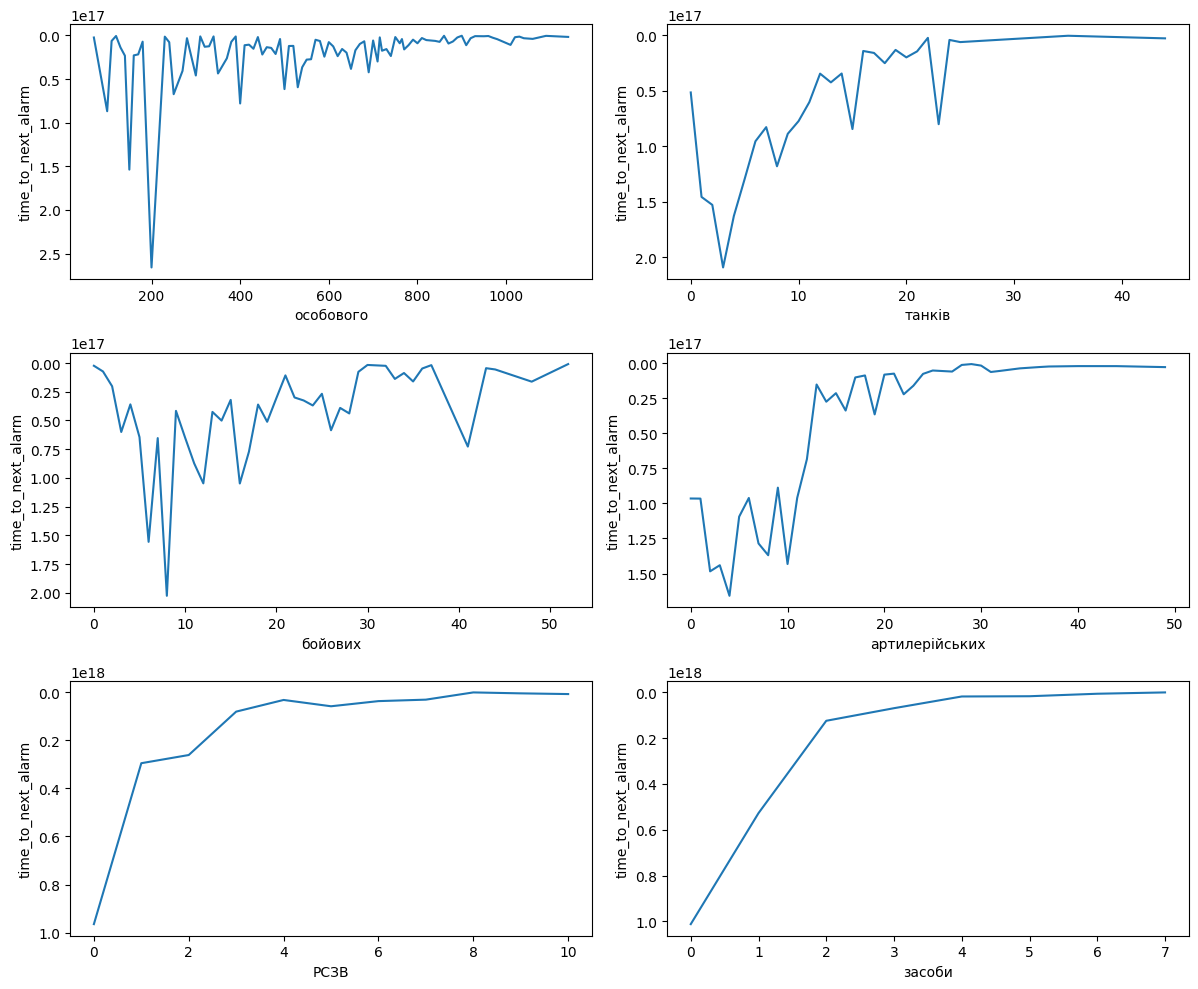

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

grouping_columns = ['особового', 'танків', 'бойових', 'артилерійських', 'РСЗВ', 'засоби']

fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

for ind, column in enumerate(grouping_columns):
    grouped_data = result.groupby(column)['time_to_next_alarm'].sum()
    grouped_data = pd.DataFrame(grouped_data).reset_index()

    sns.lineplot(data=grouped_data, x=column, y='time_to_next_alarm', ax=axes[ind])

plt.tight_layout()
plt.show()
# Список стовпців, для яких потрібно побудувати графіки
#columns = ['особового', 'танків', 'бойових', 'артилерійських', 'РСЗВ', 'засоби', 'літаків', 'гелікоптерів', 'БПЛА', 'region_id', 'засоби', 'літаків', 'гелікоптерів', 'БПЛА']



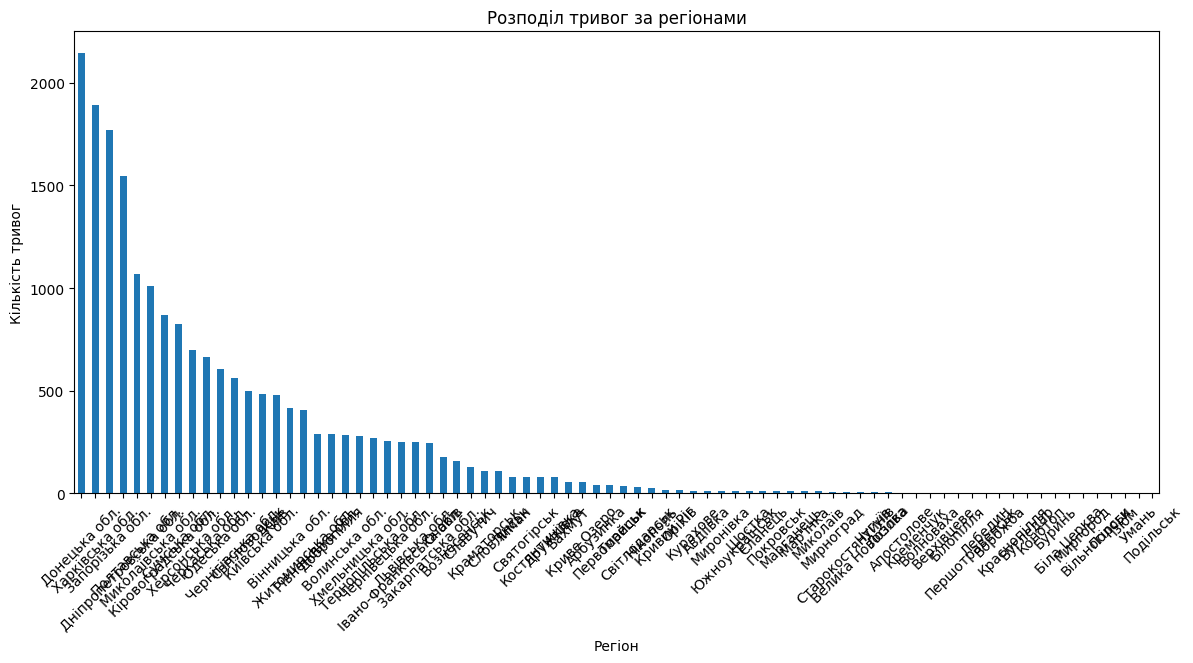

In [ ]:
plt.figure(figsize=(14,6))
result['region_city'].value_counts().plot(kind='bar')
plt.title('Розподіл тривог за регіонами')
plt.xlabel('Регіон')
plt.ylabel('Кількість тривог')
plt.xticks(rotation=45)
plt.show()

<ipython-input-40-f6840623cdba>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = result.corr()


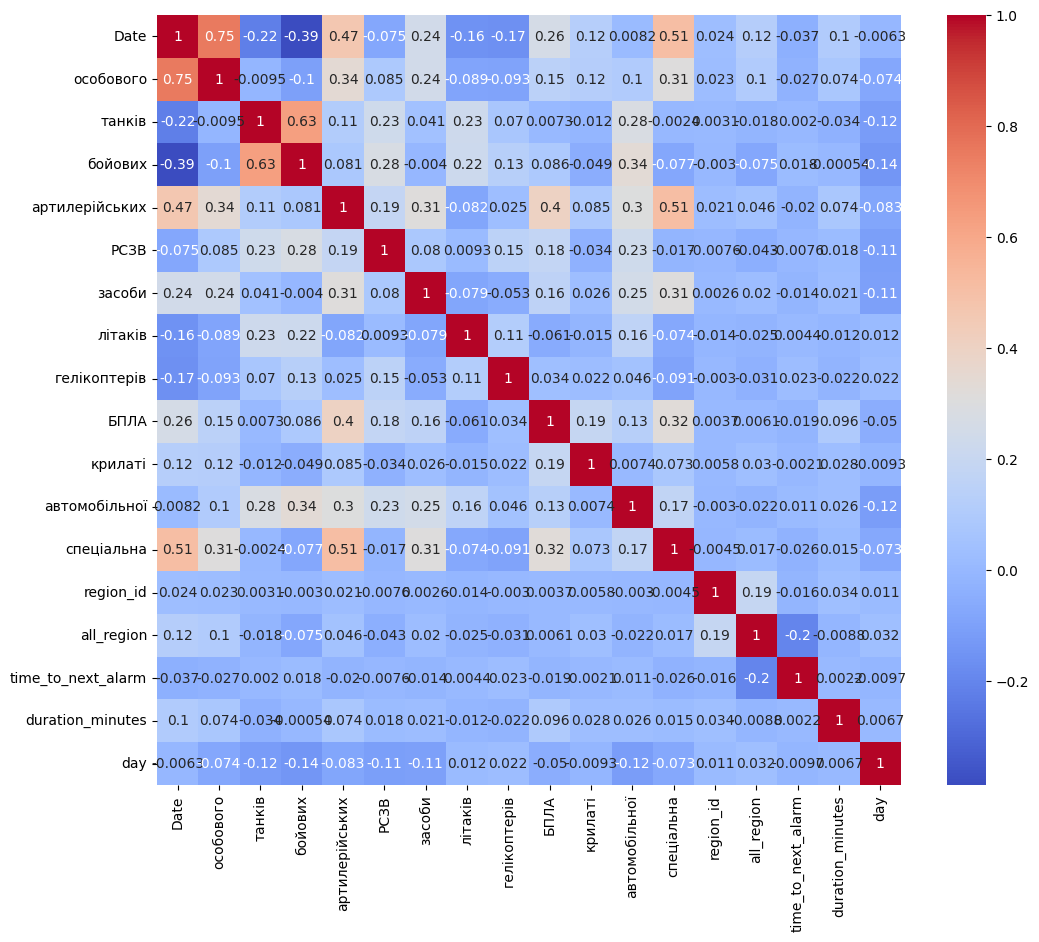

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
result['Date'] = result['Date'].astype(int) / 1_000_000_000  # перетворюємо в секунди

result['time_to_next_alarm'] =(result['time_to_next_alarm'].dt.total_seconds())/3600



correlation_matrix = result.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)  # відображення всіх стовпців
pd.set_option('display.expand_frame_repr', False)  # заборонити обмеження ширини виводу
pd.set_option('display.max_rows', None)
result

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
def time_to_minutes(t):
    return t.hour * 60 + t.minute + t.second/60.0

result['start_time_minutes'] = result['start_time'].apply(time_to_minutes)
result = result.dropna()

# Конвертація цільової змінні у секунди

# Кодуємо категоріальні змінні
result = pd.get_dummies(result, columns=['region_city'])

# Визначаємо ознаки та цільову змінну
features = result.drop(columns=['day', 'duration', 'time_to_next_alarm', 'start_time', 'time_to_next_alarm'])
target = result['time_to_next_alarm']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

RMSE: 97.98003159191985


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R^2: {r2}')

R^2: 0.08090923465548872


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Припустимо, що ваші дані знаходяться у DataFrame з назвою "data"
# і ваша цільова змінна має назву "target"

# 1. Логарифмічна трансформація цільової змінної

# 2. Розділення даних на навчальний та тестовий набори
X = features
y = np.log1p(target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Застосування лінійної регресії
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Перевірка якості моделі
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

RMSE: 1.0363659349763497
R^2: 0.3077730933181215


In [ ]:
from sklearn.preprocessing import StandardScaler
X = features
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Створення об'єкта scaler
scaler = StandardScaler()

# Тренування scaler на тренувальному наборі даних (не на тестовому!)
X_train_scaled = scaler.fit_transform(X_train)

# Застосування scaler до тестового набору даних
X_test_scaled = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Припустимо, що X_train і y_train - це ваши тренувальні дані після підготовки
# y_train має бути часом до наступної тривоги у форматі числа (наприклад, в секундах або хвилинах)

model = keras.Sequential([
    keras.layers.Dense(512, kernel_initializer='he_normal', input_shape=(X_train.shape[1],)),
    keras.layers.LeakyReLU(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(256, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(128, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(64, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=70, validation_split=0.2, batch_size=32)




Epoch 1/70
398/398 [==============================] - 8s 16ms/step - loss: 16304794293501952.0000 - mae: 73819320.0000 - val_loss: 27485553033216.0000 - val_mae: 5242552.0000
Epoch 2/70
398/398 [==============================] - 4s 11ms/step - loss: 1772744798633984.0000 - mae: 33004634.0000 - val_loss: 59995882258432.0000 - val_mae: 7745531.5000
Epoch 3/70
398/398 [==============================] - 5s 12ms/step - loss: 1003838345576448.0000 - mae: 24926288.0000 - val_loss: 16050812878848.0000 - val_mae: 4006258.5000
Epoch 4/70
398/398 [==============================] - 4s 11ms/step - loss: 695063214555136.0000 - mae: 20732160.0000 - val_loss: 556679626752.0000 - val_mae: 746093.3750
Epoch 5/70
398/398 [==============================] - 5s 12ms/step - loss: 515845268701184.0000 - mae: 17843332.0000 - val_loss: 4481940455424.0000 - val_mae: 2117013.2500
Epoch 6/70
398/398 [==============================] - 4s 11ms/step - loss: 391965124329472.0000 - mae: 15555510.0000 - val_loss: 254628

In [ ]:
y_pred = model.predict(X_test)

125/125 [==============================] - 1s 3ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")

MSE: 10601.854379765271
MAE: 34.21659253534731


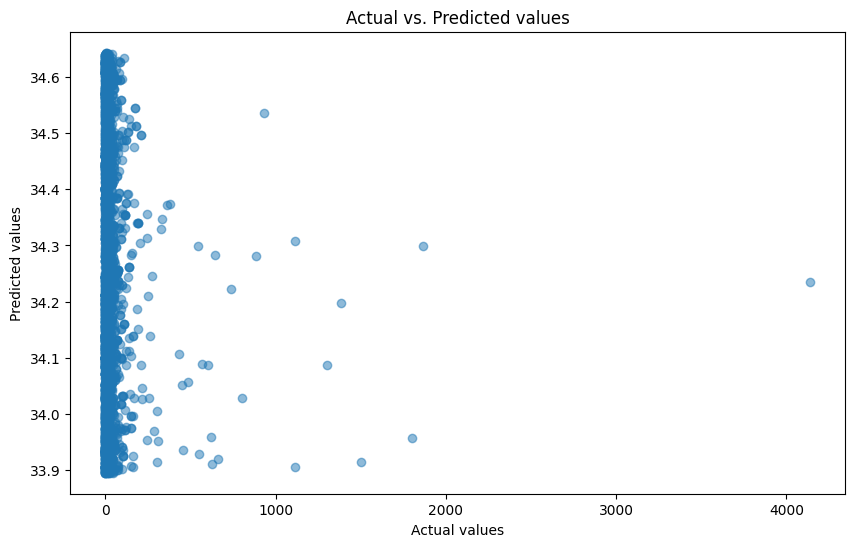

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs. Predicted values")
plt.show()